In [1]:
from compress import main
import pandas as pd
import matplotlib.pyplot as plt
import json
from compress import main
from tqdm.notebook import tqdm

In [2]:
models_df = pd.read_csv("../nunits_exp/results.csv")
models_df = models_df.loc[models_df["nunits"] <= 256]
nunits=256
data_aug=False

In [4]:
rrt_256 = json.load(open("./figures/Rank_Reduced_Training_nunits=256_dataaug=False.json", "r"))

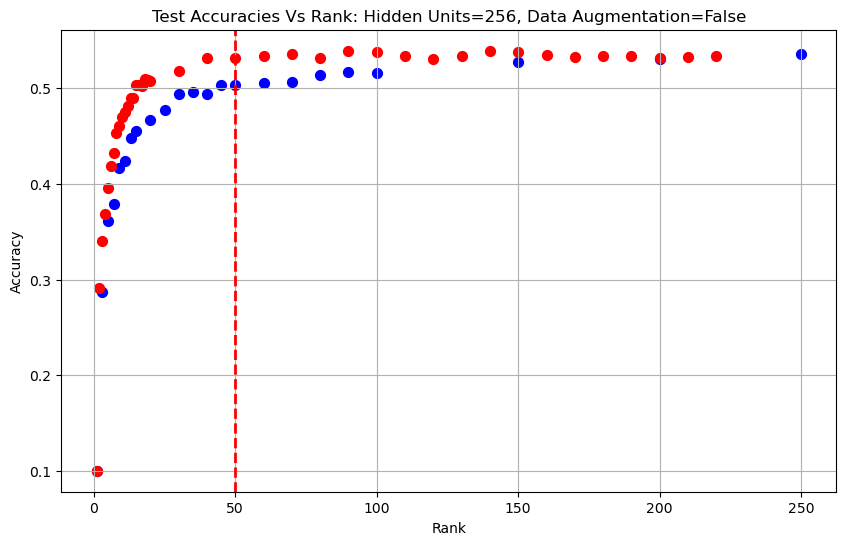

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(models_df["nunits"], models_df["val_acc"], color='blue', s=50)
plt.scatter(rrt_256["rank_constraints"], rrt_256["val_accs"], color="red", s=50)
plt.title(f'Test Accuracies Vs Rank: Hidden Units={nunits}, Data Augmentation={bool(data_aug)}')
plt.xlabel('Rank')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig("./figures/Rank_constraint_vs_small_model_256.png")

In [5]:
reg_models_df = pd.read_csv("../Downloads/results.csv")
reg_models_df

,Unnamed: 0,model_id,train_acc,train_loss,val_acc,val_loss,datadir,nchannels,nclasses,nunits,...,l2,dropout,nlayers,rank_constraint,data_aug,device,train_dataset_path,val_dataset_path,checkpoint_path,training_time
0,0,0,0.67780,0.925592,0.5368,1.422607,datasets,3,10,256,...,0.00,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554
1,1,1,0.74796,0.731219,0.5570,1.295658,datasets,3,10,256,...,0.00,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442
2,2,2,0.64138,1.024430,0.5337,1.310140,datasets,3,10,256,...,0.00,0.50,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_2.pt,80.405609
3,3,3,0.65566,0.997742,0.5386,1.349168,datasets,3,10,256,...,0.01,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_3.pt,80.241499
4,4,4,0.58462,1.204006,0.5350,1.332390,datasets,3,10,256,...,0.01,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_4.pt,80.291114
5,5,5,0.52604,1.362426,0.5053,1.419070,datasets,3,10,256,...,0.01,0.50,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_5.pt,80.291972
6,6,6,0.24920,1.960396,0.2517,1.958487,datasets,3,10,256,...,0.10,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_6.pt,79.625279
7,7,7,0.23364,2.061307,0.2369,2.059770,datasets,3,10,256,...,0.10,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_7.pt,79.332326
8,8,8,0.18662,2.137762,0.1851,2.137904,datasets,3,10,256,...,0.10,0.50,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_8.pt,79.176732
9,9,9,0.99218,0.024848,0.5641,3.695829,datasets,3,10,1024,...,0.00,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_9.pt,81.474658


In [7]:
from types import SimpleNamespace
reg_models_df["rank"] = [0] * len(reg_models_df)

for i in list(range(len(reg_models_df))): 
    print(f"Compressing Model {i}")
    for rank in tqdm(range(5, reg_models_df.loc[i]["nunits"])):
        args = SimpleNamespace(checkpoint_path=reg_models_df.loc[i]["checkpoint_path"], rank=rank)
        val_acc = main(args)
        reg_models_df.loc[len(reg_models_df)] = reg_models_df.loc[i]
        reg_models_df.loc[len(reg_models_df) - 1, "val_acc"] = float(val_acc)
        reg_models_df.loc[len(reg_models_df) - 1, "rank"] = float(rank)


Compressing Model 0


  0%|          | 0/251 [00:00<?, ?it/s]

Applying truncated SVD on layer fc1.weight
Original rank 256 and reconstructed rank 5
Applying truncated SVD on layer fc2.weight
Original rank 256 and reconstructed rank 5
Applying truncated SVD on layer fc3.weight
Original rank 256 and reconstructed rank 5
Data augmentation on the train set: FALSE
Files already downloaded and verified
Data augmentation on the val set: FALSE
Files already downloaded and verified
=================== Summary for model Model with 5-Rank Approximation @ Inference===================
 Training loss: 2.502   Validation loss 2.536    Training accuracy: 0.228   Validation accuracy: 0.218

Total Parameters for Truncated Model: 920842
Applying truncated SVD on layer fc1.weight
Original rank 256 and reconstructed rank 6
Applying truncated SVD on layer fc2.weight
Original rank 256 and reconstructed rank 6
Applying truncated SVD on layer fc3.weight
Original rank 256 and reconstructed rank 6
Data augmentation on the train set: FALSE


/var/folders/zb/9vg2j2017xvf9h4y5dqdrj4r0000gn/T/ipykernel_93556/1316621109.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2184' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  reg_models_df.loc[len(reg_models_df) - 1, "rank"] = val_acc


Files already downloaded and verified
Data augmentation on the val set: FALSE
Files already downloaded and verified
=================== Summary for model Model with 6-Rank Approximation @ Inference===================
 Training loss: 2.563   Validation loss 2.593    Training accuracy: 0.227   Validation accuracy: 0.224

Total Parameters for Truncated Model: 920842
Applying truncated SVD on layer fc1.weight
Original rank 256 and reconstructed rank 7
Applying truncated SVD on layer fc2.weight
Original rank 256 and reconstructed rank 7
Applying truncated SVD on layer fc3.weight
Original rank 256 and reconstructed rank 7
Data augmentation on the train set: FALSE
Files already downloaded and verified
Data augmentation on the val set: FALSE
Files already downloaded and verified
=================== Summary for model Model with 7-Rank Approximation @ Inference===================
 Training loss: 2.345   Validation loss 2.389    Training accuracy: 0.278   Validation accuracy: 0.270

Total Paramet